### Generating **Dataset**

In [ ]:
!pip install diffusers transformers accelerate torch safetensors


In [ ]:
import os
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline
from google.colab import drive


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!df -h /content/drive


Filesystem      Size  Used Avail Use% Mounted on
drive            15G   10G  5.1G  67% /content/drive


In [ ]:
base_folder = "/content/drive/MyDrive/dog_dataset"
os.makedirs(base_folder, exist_ok=True)

print("Dataset folder:", base_folder)


Dataset folder: /content/drive/MyDrive/dog_dataset


In [ ]:
import torch
print(torch.cuda.is_available())


True


In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [ ]:
dog_breeds = [
    "Golden Retriever",
    "German Shepherd",
    "Labrador Retriever",
    "Siberian Husky",
    "Rottweiler",
    "Doberman",
    "Bulldog",
    "Pug",
    "Beagle",
    "Dalmatian",
    "Chihuahua",
    "Pomeranian",
    "Shih Tzu",
    "Great Dane",
    "Saint Bernard",
    "Border Collie",
    "Akita",
    "Samoyed",
    "Boxer",
    "Dachshund"
]


In [ ]:
def generate_dog_image(breed):
    breed_folder = os.path.join(base_folder, breed.replace(" ", "_"))
    os.makedirs(breed_folder, exist_ok=True)

    prompt = f"A high quality photo of a {breed} dog"

    # resume-safe count
    img_id = len(os.listdir(breed_folder)) + 1

    image = pipe(prompt).images[0]
    img_path = os.path.join(breed_folder, f"img{img_id}.png")
    image.save(img_path)

    print(f"Saved: {img_path}")


In [ ]:
TARGET_IMAGES = 20

for breed in dog_breeds:
    print(f"\nProcessing breed: {breed}")
    breed_folder = os.path.join(base_folder, breed.replace(" ", "_"))
    os.makedirs(breed_folder, exist_ok=True)

    while len(os.listdir(breed_folder)) < TARGET_IMAGES:
        generate_dog_image(breed)



Processing breed: Golden Retriever


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Golden_Retriever/img20.png

Processing breed: German Shepherd


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/German_Shepherd/img20.png

Processing breed: Labrador Retriever


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Labrador_Retriever/img20.png

Processing breed: Siberian Husky


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Siberian_Husky/img20.png

Processing breed: Rottweiler


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Rottweiler/img20.png

Processing breed: Doberman


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Doberman/img20.png

Processing breed: Bulldog


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Bulldog/img20.png

Processing breed: Pug


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pug/img20.png

Processing breed: Beagle


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Beagle/img20.png

Processing breed: Dalmatian


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dalmatian/img20.png

Processing breed: Chihuahua


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Chihuahua/img20.png

Processing breed: Pomeranian


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Pomeranian/img20.png

Processing breed: Shih Tzu


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Shih_Tzu/img20.png

Processing breed: Great Dane


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Great_Dane/img20.png

Processing breed: Saint Bernard


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Saint_Bernard/img20.png

Processing breed: Border Collie


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Border_Collie/img20.png

Processing breed: Akita


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Saved: /content/drive/MyDrive/dog_dataset/Akita/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Akita/img20.png

Processing breed: Samoyed


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Samoyed/img20.png

Processing breed: Boxer


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Boxer/img20.png

Processing breed: Dachshund


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/dog_dataset/Dachshund/img20.png


In [ ]:
for root, dirs, files in os.walk(base_folder):
    level = root.replace(base_folder, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    for f in files:
        print(f"{indent}    {f}")


dog_dataset/
    Golden_Retriever/
        img1.png
        img2.png
        img3.png
        img4.png
        img5.png
        img6.png
        img7.png
        img8.png
        img9.png
        img10.png
        img11.png
        img12.png
        img13.png
        img14.png
        img15.png
        img16.png
        img17.png
        img18.png
        img19.png
        img20.png
    German_Shepherd/
        img1.png
        img2.png
        img3.png
        img4.png
        img5.png
        img6.png
        img7.png
        img8.png
        img9.png
        img10.png
        img11.png
        img12.png
        img13.png
        img14.png
        img15.png
        img16.png
        img17.png
        img18.png
        img19.png
        img20.png
    Labrador_Retriever/
        img1.png
        img2.png
        img3.png
        img4.png
        img5.png
        img6.png
        img7.png
        img8.png
        img9.png
        img10.png
        img11.png
        img12.png
        img

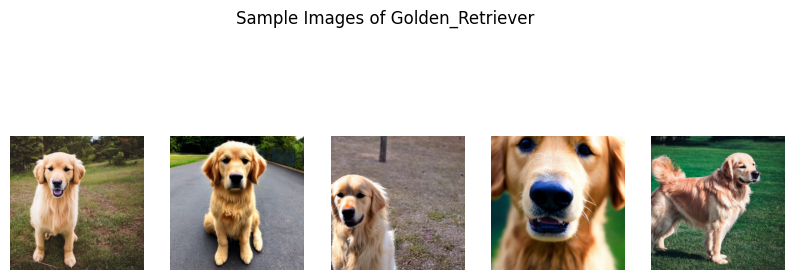

In [ ]:
breed = "Golden_Retriever"   # change breed here
breed_path = os.path.join(base_folder, breed)

images = os.listdir(breed_path)

plt.figure(figsize=(10, 4))
for i, img_name in enumerate(images[:5]):   # first 5 images
    img = plt.imread(os.path.join(breed_path, img_name))
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.suptitle(f"Sample Images of {breed}")
plt.show()


In [ ]:
!df -h /content/drive


Filesystem      Size  Used Avail Use% Mounted on
drive            15G   11G  4.9G  68% /content/drive


In [ ]:
!zip -r dog_dataset.zip /content/drive/MyDrive/dog_dataset


  adding: content/drive/MyDrive/dog_dataset/ (stored 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/ (stored 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/img1.png (deflated 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/img2.png (deflated 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/img3.png (deflated 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/img4.png (deflated 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/img5.png (deflated 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/img6.png (deflated 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/img7.png (deflated 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/img8.png (deflated 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/img9.png (deflated 0%)
  adding: content/drive/MyDrive/dog_dataset/Golden_Retriever/img10.png (deflated 0%)
  adding: content/drive/MyDr

In [ ]:
from google.colab import files
files.download("dog_dataset.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>